In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [90]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

In [91]:
def compute_loss(features, target, weights):
    predictions = predict(features, weights)
    loss = -np.mean(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
    return loss

In [92]:
def gradient_descent(features, target, num_iterations, learning_rate):
    num_samples, num_features = features.shape
    weights = np.zeros(num_features)

    for _ in range(num_iterations):
        predictions = predict(features, weights)
        error = target - predictions
        gradient = np.dot(features.T, error) / num_samples
        weights += learning_rate * gradient

    return weights

In [93]:
def normalize_features(features):
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    std[std == 0] = 1  # Menghindari pembagian dengan nol
    normalized_features = (features - mean) / std
    return normalized_features


In [94]:
def plot_decision_boundary(features, target, weights):
    plt.figure(figsize=(10, 6))

    # Memplot titik data
    plt.scatter(features[target == 1][:, 0], features[target == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(features[target == 0][:, 0], features[target == 0][:, 1], color='red', label='Class 0')

    # Memplot garis keputusan
    x_values = np.array([np.min(features[:, 1]), np.max(features[:, 1])])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Logistic Regression')
    plt.show()

In [95]:
df = pd.read_csv("../dataset/ex2data1.txt", delimiter=",")

In [96]:
X = df[['x', 'y']].values
y = df['kategory'].values

In [97]:
X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
print(X_with_bias)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

In [98]:
X_normalized = normalize_features(X_with_bias)
print(X_normalized)

[[ 0.         -1.60224763  0.63834112]
 [ 0.         -1.82625564 -1.2075414 ]
 [ 0.         -1.53903969  0.3612943 ]
 [ 0.         -0.28210129  1.0863683 ]
 [ 0.          0.69152826  0.49337794]
 [ 0.         -1.06199728 -0.5357394 ]
 [ 0.         -0.23437234  1.63818413]
 [ 0.          0.4845113  -1.06373024]
 [ 0.          0.53998666  1.14651105]
 [ 0.          0.97044832 -1.22709853]
 [ 0.          1.56075461 -1.51418452]
 [ 0.          0.48393864 -1.92641626]
 [ 0.          0.86065022  0.55490359]
 [ 0.          0.1921582   1.70347834]
 [ 0.         -1.34839922  0.53082781]
 [ 0.         -0.60293429  1.24314792]
 [ 0.          0.17694982 -0.72913975]
 [ 0.          0.11893077 -1.05699346]
 [ 0.          0.25914553  1.44433023]
 [ 0.          0.58543944 -1.00845873]
 [ 0.          0.0892403  -1.26468472]
 [ 0.          1.2413042  -0.02285779]
 [ 0.         -0.78042096 -0.93923898]
 [ 0.         -1.62350714 -1.19053019]
 [ 0.          0.63426559  0.14875155]
 [ 0.         -0.17423248

In [99]:
learning_rate = 0.1
num_iterations = 1000

In [100]:
weights = gradient_descent(X_normalized, y, num_iterations, learning_rate)

In [115]:
final_loss = compute_loss(X_with_bias, y, weights)
print("Final Loss:", final_loss)

Final Loss: nan


/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_5926/2429025495.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))
/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_5926/2429025495.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(target * np.log(predictions) + (1 - target) * np.log(1 - predictions))


In [116]:
print(weights)

[0.         2.62124211 2.32829984]


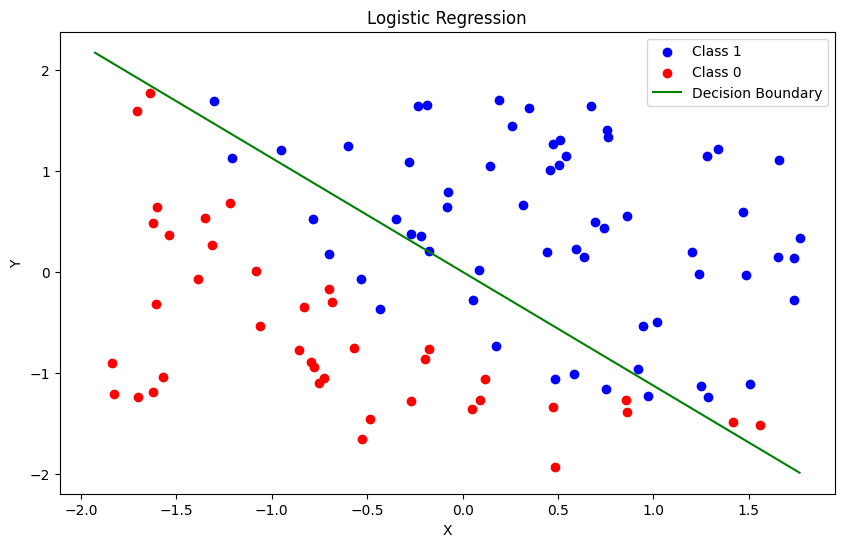

In [121]:
plot_decision_boundary(X_normalized[:, 1:], y, weights)

In [122]:
features_to_predict = np.array([
     [1, 67.94685548, 46.67857411],  # Contoh fitur baru 1
    [1, 70.66150955, 92.92713789],  # Contoh fitur baru 2
    [1, 76.97878373, 47.57596365] ,
    [1, 76.97878373, 47.57596365] 
    
    
])
predictions = predict(normalize_features(features_to_predict), weights)
print("Predictions:")
print(predictions)

Predictions:
[0.00771494 0.91595451 0.77453917 0.77453917]
